In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
data.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [6]:
data_modified = data.replace({"Yes": 0, "No": 1})
data_modified

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,0,1,0,1,0,0,1,0,1,1,-3,61,Every three months,Female
1,0,0,1,0,0,0,0,0,0,1,1,+2,51,Every three months,Female
2,1,0,0,0,0,0,1,0,0,0,1,+1,62,Every three months,Female
3,0,0,1,0,0,0,0,0,1,1,0,+4,69,Once a week,Female
4,1,0,1,0,0,0,0,1,1,0,1,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,0,0,1,1,1,0,1,0,I hate it!-5,47,Once a year,Male
1449,0,0,1,0,1,1,0,0,1,0,1,+2,36,Once a week,Female
1450,0,0,1,0,1,0,1,0,0,1,1,+3,52,Once a month,Female
1451,0,0,1,1,1,0,0,0,1,0,1,+4,41,Every three months,Male


In [7]:
data_modified["VisitFrequency"].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [8]:
'''
Yes - 1
No - 0

Never - 0days
More than once a week - 3days
Once a week - 1*7 = 7days
Once a month - 1*30 = 30days
Every three months - 3*30 = 90 days
Once a year - 365days

Female - 0
Male - 1
'''

'\nYes - 1\nNo - 0\n\nNever - 0days\nMore than once a week - 3days\nOnce a week - 1*7 = 7days\nOnce a month - 1*30 = 30days\nEvery three months - 3*30 = 90 days\nOnce a year - 365days\n\nFemale - 0\nMale - 1\n'

In [9]:
d = {'Never': 0, 'More than once a week': 3, 'Once a week': 7, 'Once a month': 30, 'Every three months': 90, 'Once a year': 365}
data_modified["VisitFrequency"] = data_modified["VisitFrequency"].map(d)
data_modified

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,0,1,0,1,0,0,1,0,1,1,-3,61,90,Female
1,0,0,1,0,0,0,0,0,0,1,1,+2,51,90,Female
2,1,0,0,0,0,0,1,0,0,0,1,+1,62,90,Female
3,0,0,1,0,0,0,0,0,1,1,0,+4,69,7,Female
4,1,0,1,0,0,0,0,1,1,0,1,+2,49,30,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,0,0,1,1,1,0,1,0,I hate it!-5,47,365,Male
1449,0,0,1,0,1,1,0,0,1,0,1,+2,36,7,Female
1450,0,0,1,0,1,0,1,0,0,1,1,+3,52,30,Female
1451,0,0,1,1,1,0,0,0,1,0,1,+4,41,90,Male


In [10]:
data_modified["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data_modified["Gender"] = data_modified["Gender"].map({'Female': 0, 'Male': 1})
data_modified

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,0,1,0,1,0,0,1,0,1,1,-3,61,90,0
1,0,0,1,0,0,0,0,0,0,1,1,+2,51,90,0
2,1,0,0,0,0,0,1,0,0,0,1,+1,62,90,0
3,0,0,1,0,0,0,0,0,1,1,0,+4,69,7,0
4,1,0,1,0,0,0,0,1,1,0,1,+2,49,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,0,0,1,1,1,0,1,0,I hate it!-5,47,365,1
1449,0,0,1,0,1,1,0,0,1,0,1,+2,36,7,0
1450,0,0,1,0,1,0,1,0,0,1,1,+3,52,30,0
1451,0,0,1,1,1,0,0,0,1,0,1,+4,41,90,1


In [12]:
data_modified["Like"].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [13]:
type(data_modified["Like"][1448])

str

In [14]:
data_modified["Like"].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [15]:
import re
for i in range(len(data_modified)):
    temp = re.findall(r'-?\d+', data_modified["Like"][i])
    num = int(temp[0])
    data_modified["Like"][i] = num
    
data_modified

C:\Users\anish\AppData\Local\Temp\ipykernel_20208\125408012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified["Like"][i] = num


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,0,1,0,1,0,0,1,0,1,1,-3,61,90,0
1,0,0,1,0,0,0,0,0,0,1,1,2,51,90,0
2,1,0,0,0,0,0,1,0,0,0,1,1,62,90,0
3,0,0,1,0,0,0,0,0,1,1,0,4,69,7,0
4,1,0,1,0,0,0,0,1,1,0,1,2,49,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,0,0,1,1,1,0,1,0,-5,47,365,1
1449,0,0,1,0,1,1,0,0,1,0,1,2,36,7,0
1450,0,0,1,0,1,0,1,0,0,1,1,3,52,30,0
1451,0,0,1,1,1,0,0,0,1,0,1,4,41,90,1


In [16]:
data_modified["Like"] = data_modified["Like"].astype(int)

In [17]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int32
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int32(1), int64(14)
memory usage: 164.7 KB


In [18]:
data_modified.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,0,1,0,1,0,0,1,0,1,1,-3,61,90,0
1,0,0,1,0,0,0,0,0,0,1,1,2,51,90,0
2,1,0,0,0,0,0,1,0,0,0,1,1,62,90,0
3,0,0,1,0,0,0,0,0,1,1,0,4,69,7,0
4,1,0,1,0,0,0,0,1,1,0,1,2,49,30,1


In [19]:
data_modified.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [20]:
data_modified.to_csv("clean_data.csv")

In [21]:
data_modified.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.447350,0.092223,0.906401,0.132829,0.473503,0.099794,0.401239,0.355816,0.642120,0.801101,0.757054,0.777013,44.604955,94.794907,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,127.740576,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,33.000000,7.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,45.000000,30.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,57.000000,90.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,365.000000,1.000000


In [22]:
data_modified.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,0,1,0,1,0,0,1,0,1,1,-3,61,90,0
1,0,0,1,0,0,0,0,0,0,1,1,2,51,90,0
2,1,0,0,0,0,0,1,0,0,0,1,1,62,90,0
3,0,0,1,0,0,0,0,0,1,1,0,4,69,7,0
4,1,0,1,0,0,0,0,1,1,0,1,2,49,30,1


In [23]:
data_modified["Gender"].value_counts()

0    788
1    665
Name: Gender, dtype: int64

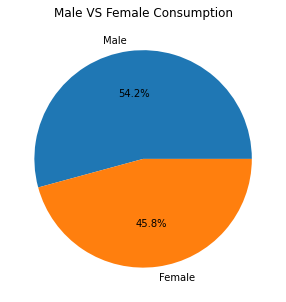

In [24]:
plt.figure(figsize=(5,5))
plt.title("Male VS Female Consumption")
plt.pie(data_modified["Gender"].value_counts(), labels=["Male", "Female"], autopct='%1.1f%%')
plt.show()

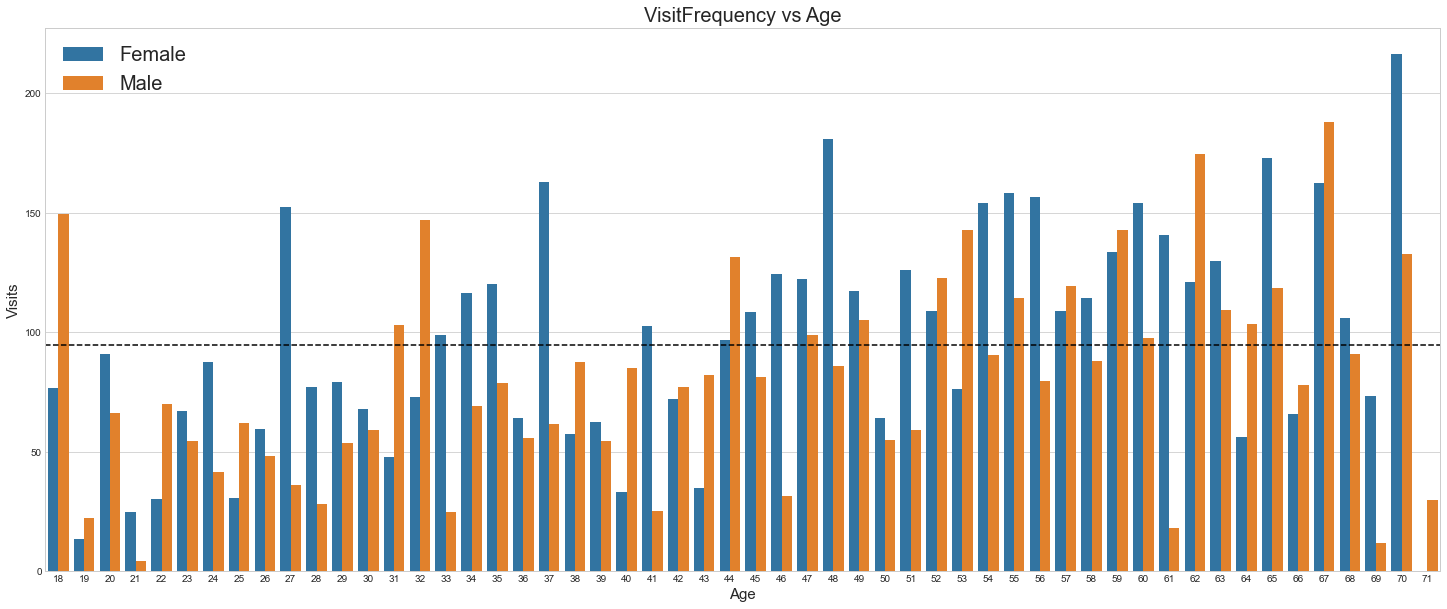

In [64]:
plt.figure(figsize=(25,10))
plt.style.use("seaborn-whitegrid")
plt.title('VisitFrequency vs Age', fontsize=20)

ageplot = sns.barplot(
    x="Age", y="VisitFrequency", 
    hue="Gender",data=data_modified,
    ci=None)

plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Visits", fontsize = 15)
plt.axhline(data_modified["VisitFrequency"].mean(), linestyle='--', color='k')
plt.show()

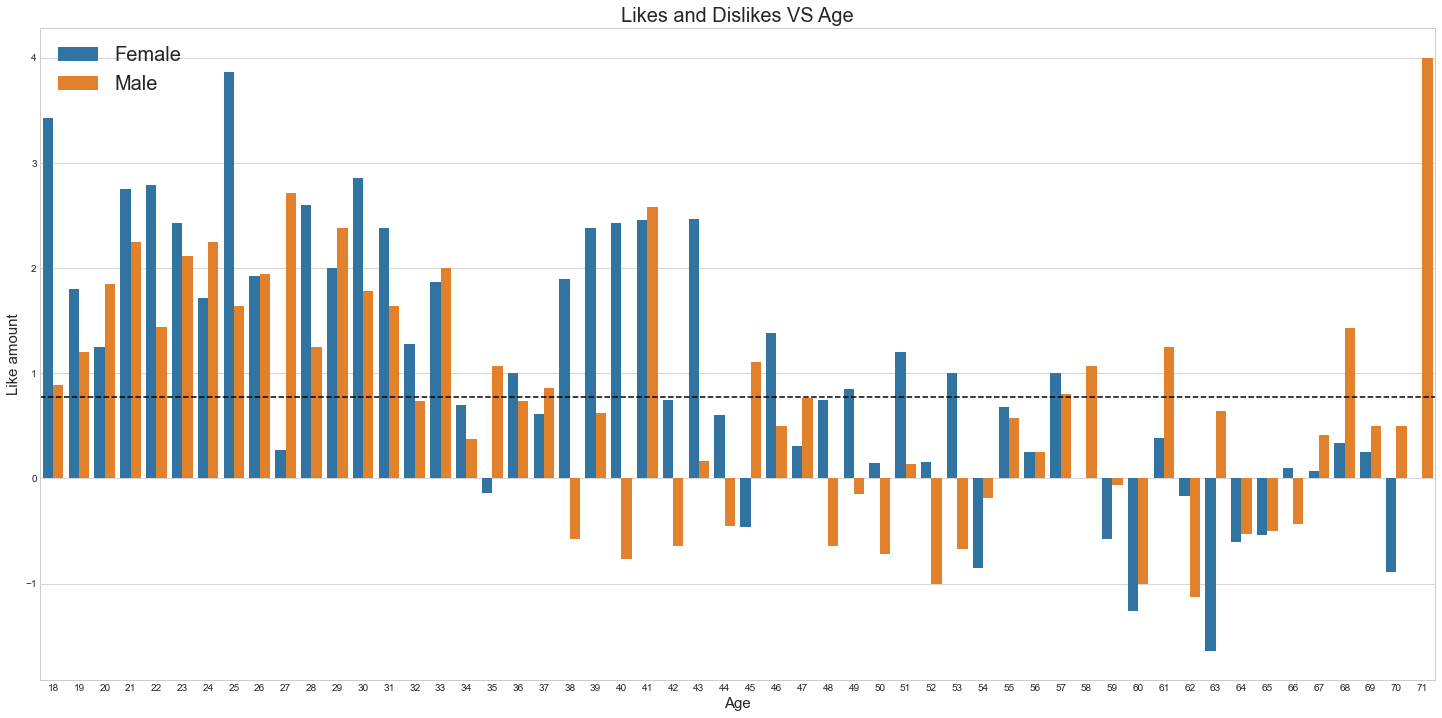

In [65]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Likes and Dislikes VS Age', fontsize=20)
bar = sns.barplot(
    data=data_modified, 
    y="Like", x="Age",
    hue="Gender",
    ci = None 
)
plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Like amount", fontsize = 15)
plt.axhline(data_modified["Like"].mean(), linestyle='--', color='k')
plt.show()

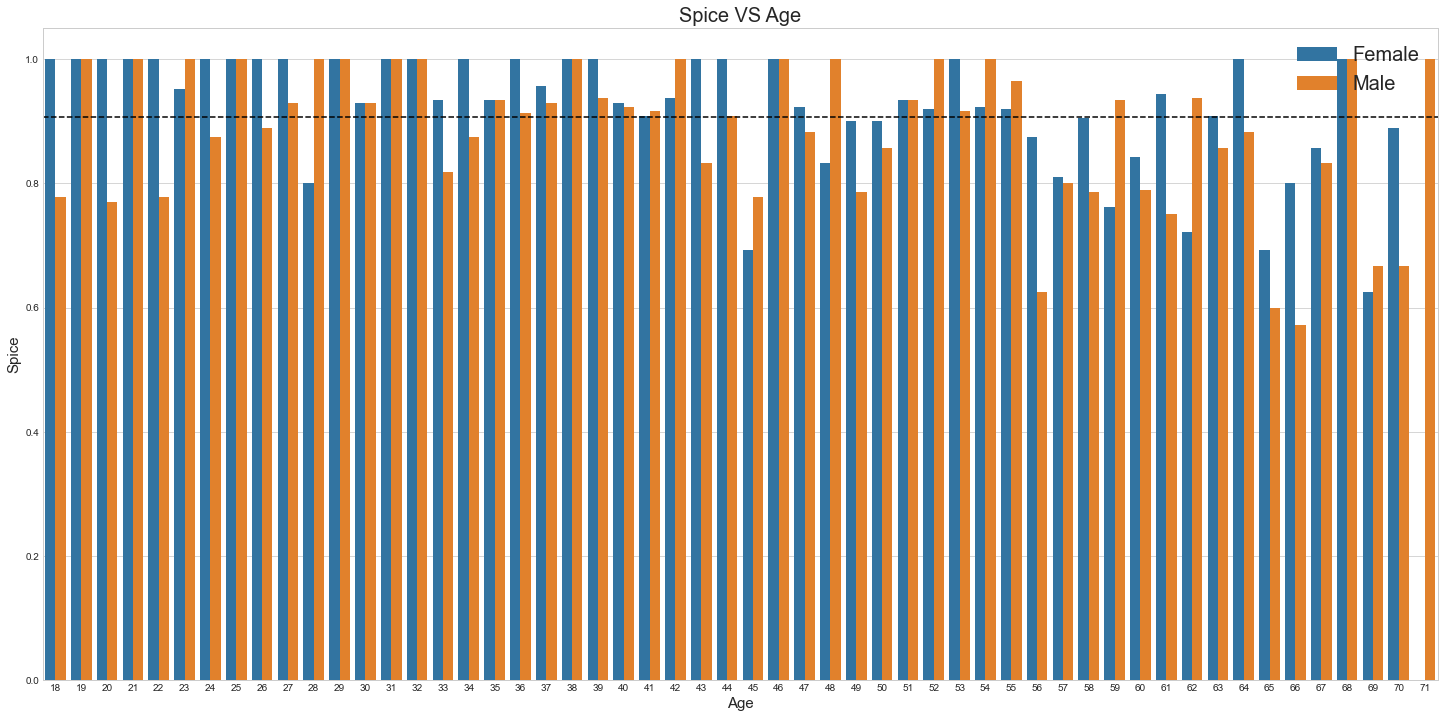

In [61]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Spice VS Age', fontsize=20)
bar = sns.barplot(
    data=data_modified, 
    y="spicy", x="Age",
    hue="Gender",
    ci = None 
)

plt.legend(["Female", "Male"], fontsize=20)
plt.ylabel("Spice", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.axhline(data_modified["spicy"].mean(), linestyle='--', color='k')
plt.show()

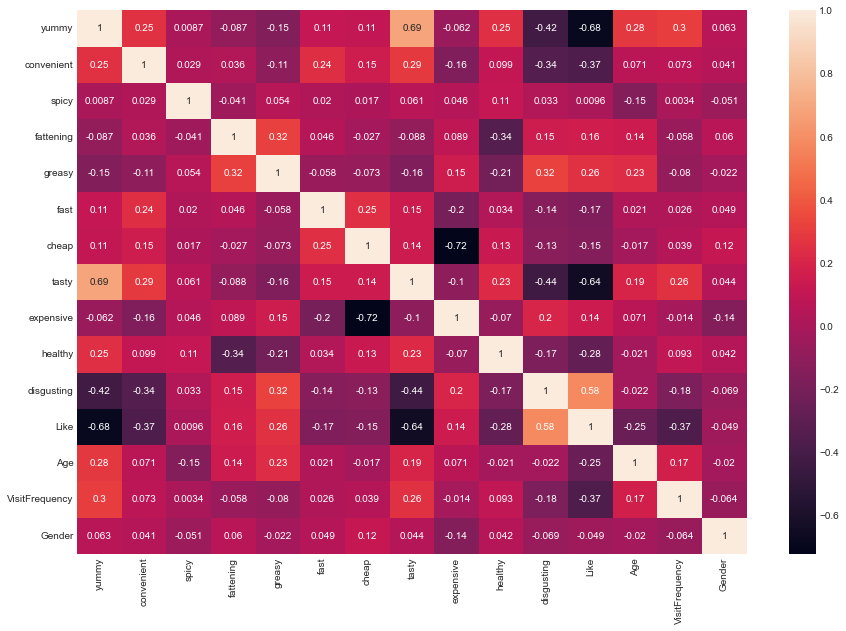

In [66]:
plt. figure(figsize=(15,10))

cor = data_modified.corr()
sns.heatmap(cor, annot=True)
plt.show()